In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
wnba = pd.read_csv("wnba.csv")

In [3]:
wnba.shape

(143, 32)

In [4]:
pd.set_option("display.max_columns", 32)

In [5]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


In [7]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [8]:
parameter = wnba["Games Played"].max()

In [10]:
wnba["Games Played"].shape

(143,)

### Simple Random Sampling

In [11]:
sample = wnba["Games Played"].sample(10, random_state = 1)

In [12]:
sample

78     30
116    29
31     26
5      14
125    28
45     20
14      4
44     28
73     14
89     20
Name: Games Played, dtype: int64

In [13]:
wnba["Games Played"].head(10)

0     8
1    30
2    26
3    31
4    24
5    14
6    16
7    26
8    30
9     7
Name: Games Played, dtype: int64

In [14]:
statistic = sample.max()
statistic

30

In [15]:
# sampling_error = parameter - statistic

In [16]:
sampling_error = parameter - statistic

In [17]:
sampling_error

2

In [18]:
pop_mean = wnba["Games Played"].mean()
pop_mean 

24.356643356643357

In [19]:
sample_mean = []

for i in range(100):
    sample = wnba["Games Played"].sample(10, random_state = i)
    mean = sample.mean()
    sample_mean.append(mean)         

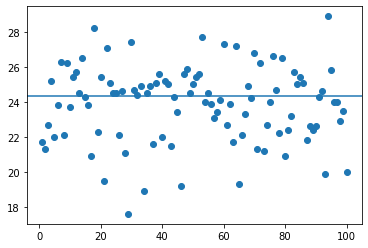

In [20]:
plt.scatter(range(1,101), sample_mean)
plt.axhline(pop_mean)
plt.show()

In [21]:
sample_mean = []

for i in range(100):
    sample = wnba["Games Played"].sample(100, random_state = i)
    mean = sample.mean()
    sample_mean.append(mean)     # 100 sample mean

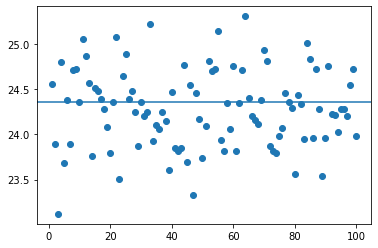

In [22]:
plt.scatter(range(1,101), sample_mean)
plt.axhline(pop_mean)
plt.show()

# 10 samples are taken through random sample.

In [23]:
wnba["PTS"].mean()

201.7902097902098

### stratified sampling

In [24]:
wnba["Games Played"].value_counts(bins = 3).sort_index() 

(1.969, 12.0]     13
(12.0, 22.0]      26
(22.0, 32.0]     104
Name: Games Played, dtype: int64

In [25]:
wnba["Games Played"].min()

2

In [26]:
(wnba["Games Played"].value_counts(bins = 3, normalize = True).sort_index())*100

# left is game played.e.g. max 32

(1.969, 12.0]     9.090909
(12.0, 22.0]     18.181818
(22.0, 32.0]     72.727273
Name: Games Played, dtype: float64

In [27]:
# 10%
# 20%
# 70%

In [28]:
stratum1 = wnba[wnba["Games Played"]<=12]
stratum2 = wnba[wnba["Games Played"].between(13,22)]
stratum3 = wnba[wnba["Games Played"]>=23]

In [29]:
print(stratum1.shape[0])
print(stratum2.shape[0])
print(stratum3.shape[0])

13
26
104


In [30]:
print(10*.1)
print(10*.2)
print(10*.7)

1.0
2.0
7.0


In [31]:
stratums = [stratum1,stratum2,stratum3]

In [32]:
s1 = stratum1.sample(1, random_state = 1)
s2 = stratum2.sample(2, random_state = 1)
s3 = stratum3.sample(7, random_state = 1)

df = pd.concat([s1,s2,s3]) # in total, we are taking 10 samples. 

In [33]:
df['Games Played'] ################# my work ###################3

14      4
91     14
54     15
132    31
57     29
114    25
86     30
60     28
61     27
79     28
Name: Games Played, dtype: int64

In [34]:
# stratum1.sample(1, random_state = 1)

In [35]:
df["PTS"].mean()  # statistic on points basis . increase the sample size to 30. 

163.6

In [36]:
wnba["PTS"].mean() # parameter on points basis 

201.7902097902098

In [37]:
s4 = stratum1.sample(3, random_state = 1)
s5 = stratum2.sample(6, random_state = 1)
s6 = stratum3.sample(21, random_state = 1)

df2 = pd.concat([s1,s2,s3])

In [38]:
df["PTS"].mean()

163.6

In [39]:
#######################################################

In [40]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [41]:
len(wnba["Team"].unique())

12

In [42]:
wnba["Team"].sample(4, random_state = 2)

97     SAN
119    WAS
48     PHO
54      LA
Name: Team, dtype: object

In [43]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


In [44]:
wnba["Age"].value_counts().sort_index()

21     2
22    10
23    15
24    16
25    15
26    12
27    13
28    14
29     8
30     9
31     8
32     8
33     3
34     5
35     4
36     1
Name: Age, dtype: int64

In [45]:
(wnba["Age"].value_counts(normalize = True).sort_index()).loc[:23]

21    0.013986
22    0.069930
23    0.104895
Name: Age, dtype: float64

In [46]:
wnba["Age"].value_counts().sum()

143

In [47]:
(wnba["Age"].value_counts(normalize = True).sort_index()*100).loc[:23]

21     1.398601
22     6.993007
23    10.489510
Name: Age, dtype: float64

In [48]:
(wnba["Age"].value_counts(normalize = True).sort_index()*100).loc[:23].sum()

18.88111888111888

In [49]:
100*100/100

100.0

In [50]:
50*100/50

100.0

In [51]:
(2+48)/50*100  ### PERCENTILE

100.0

In [52]:
98*100/100

98.0

In [53]:
(1+47)*100/50

96.0

In [54]:
(1+46)*100/50

94.0

In [55]:
100 -2
99 -3
98  -1

97

In [56]:
45*100/50

90.0

In [57]:
from scipy.stats import percentileofscore

In [58]:
percentileofscore(a = wnba["Age"], score= 23, kind = "weak")

18.88111888111888

In [59]:
wnba["Age"].max()

36

In [60]:
percentileofscore(a = wnba["Age"], score= 36, kind = "weak")

100.0

In [61]:
wnba["Age"].describe()

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64

In [62]:
percentileofscore(a = wnba["Age"], score= 24, kind = "rank")

24.825174825174827

In [63]:
# (wnba["Age"].value_counts(normalize = True).sort_index()*100)

In [64]:
wnba["PTS"].value_counts(bins = 30)

(1.417, 21.4]     12
(40.8, 60.2]      10
(215.4, 234.8]    10
(234.8, 254.2]    10
(60.2, 79.6]       9
(79.6, 99.0]       9
(137.8, 157.2]     9
(21.4, 40.8]       8
(99.0, 118.4]      6
(196.0, 215.4]     6
(390.0, 409.4]     5
(254.2, 273.6]     4
(118.4, 137.8]     4
(157.2, 176.6]     4
(176.6, 196.0]     4
(564.6, 584.0]     4
(312.4, 331.8]     4
(448.2, 467.6]     4
(331.8, 351.2]     3
(351.2, 370.6]     3
(428.8, 448.2]     3
(273.6, 293.0]     3
(370.6, 390.0]     2
(487.0, 506.4]     2
(506.4, 525.8]     2
(293.0, 312.4]     1
(409.4, 428.8]     1
(525.8, 545.2]     1
(545.2, 564.6]     0
(467.6, 487.0]     0
Name: PTS, dtype: int64

In [65]:
wnba["PTS"].value_counts(bins = 2)

(1.417, 293.0]    108
(293.0, 584.0]     35
Name: PTS, dtype: int64

In [66]:
wnba["PTS"].value_counts(bins = 6)

(1.417, 99.0]     48
(196.0, 293.0]    33
(99.0, 196.0]     27
(390.0, 487.0]    13
(293.0, 390.0]    13
(487.0, 584.0]     9
Name: PTS, dtype: int64

In [67]:
interval = pd.interval_range(start = 0, end = 600, freq = 100)

In [68]:
interval

IntervalIndex([(0, 100], (100, 200], (200, 300], (300, 400], (400, 500], (500, 600]],
              closed='right',
              dtype='interval[int64]')

In [69]:
pts = pd.Series(0, index = interval)

In [70]:
pts

(0, 100]      0
(100, 200]    0
(200, 300]    0
(300, 400]    0
(400, 500]    0
(500, 600]    0
dtype: int64

In [71]:
for i in wnba["PTS"]:
    for it in interval:
        if i in it:
            pts.loc[it]+=1


In [72]:
pts

(0, 100]      49
(100, 200]    28
(200, 300]    32
(300, 400]    17
(400, 500]    10
(500, 600]     7
dtype: int64

In [73]:
pts = pd.Series(0, index = interval)

for i in wnba["PTS"]:   # here we are counting how many players in 0-100 points category. 
    for it in interval:
        if i in it:
            pts.loc[it]+=1
            break


In [74]:
pts

(0, 100]      49
(100, 200]    28
(200, 300]    32
(300, 400]    17
(400, 500]    10
(500, 600]     7
dtype: int64

In [75]:
600/10

60.0